<a href="https://colab.research.google.com/github/Jisha25/Visualization/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***CLEANING***

load dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/User0_credit_card_transactions.csv.zip')

inspection




In [4]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            19963 non-null  int64  
 1   Card            19963 non-null  int64  
 2   Year            19963 non-null  int64  
 3   Month           19963 non-null  int64  
 4   Day             19963 non-null  int64  
 5   Time            19963 non-null  object 
 6   Amount          19963 non-null  object 
 7   Use Chip        19963 non-null  object 
 8   Merchant Name   19963 non-null  int64  
 9   Merchant City   19963 non-null  object 
 10  Merchant State  18646 non-null  object 
 11  Zip             18316 non-null  float64
 12  MCC             19963 non-null  int64  
 13  Errors?         574 non-null    object 
 14  Is Fraud?       19963 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.3+ MB


In [6]:
df.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,19963.0,19963.000000,19963.000000,19963.000000,19963.000000,1.996300e+04,18316.000000,19963.000000
mean,0.0,1.910735,2011.011922,6.568101,15.743876,7.825653e+17,88812.744922,5617.940239
std,0.0,1.237763,5.048146,3.477497,8.801378,4.040602e+18,13711.491085,707.982901
min,0.0,0.000000,2002.000000,1.000000,1.000000,-9.179793e+18,1012.000000,1711.000000
25%,0.0,0.000000,2007.000000,4.000000,8.000000,-1.288082e+18,91750.000000,5311.000000
50%,0.0,2.000000,2011.000000,7.000000,16.000000,8.384250e+17,91750.000000,5499.000000
75%,0.0,3.000000,2015.000000,10.000000,23.000000,4.060647e+18,91752.000000,5912.000000
max,0.0,4.000000,2020.000000,12.000000,31.000000,9.137769e+18,99504.000000,9402.000000


removing '$'  and convert amount to numeric

In [7]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

handle null values

In [8]:
df.isnull().sum()

,0
User,0
Card,0
Year,0
Month,0
Day,0
Time,0
Amount,0
Use Chip,0
Merchant Name,0
Merchant City,0


ensuring zip is numeric to use .median()

In [9]:
df['Zip'] = pd.to_numeric(df['Zip'], errors='coerce')


In [10]:
df['Merchant State'] = df['Merchant State'].fillna('Unknown')
df['Zip'] = df['Zip'].fillna(df['Zip'].median())
df['Errors?'] = df['Errors?'].fillna('No Error')

In [11]:
df.isnull().sum()

,0
User,0
Card,0
Year,0
Month,0
Day,0
Time,0
Amount,0
Use Chip,0
Merchant Name,0
Merchant City,0


 Convert Time to datetime format

In [12]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User            19963 non-null  int64         
 1   Card            19963 non-null  int64         
 2   Year            19963 non-null  int64         
 3   Month           19963 non-null  int64         
 4   Day             19963 non-null  int64         
 5   Time            19963 non-null  datetime64[ns]
 6   Amount          19963 non-null  float64       
 7   Use Chip        19963 non-null  object        
 8   Merchant Name   19963 non-null  int64         
 9   Merchant City   19963 non-null  object        
 10  Merchant State  19963 non-null  object        
 11  Zip             19963 non-null  float64       
 12  MCC             19963 non-null  int64         
 13  Errors?         19963 non-null  object        
 14  Is Fraud?       19963 non-null  object        
dtypes:

adding column

In [14]:
df['Transaction Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Transaction Date
0,0,0,2002,9,1,1900-01-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No Error,No,2002-09-01
1,0,0,2002,9,1,1900-01-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-01
2,0,0,2002,9,2,1900-01-01 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-02
3,0,0,2002,9,2,1900-01-01 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,No Error,No,2002-09-02
4,0,0,2002,9,3,1900-01-01 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,No Error,No,2002-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,1900-01-01 13:03:00,9.71,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Technical Glitch,No,2009-02-12
19959,0,4,2009,2,22,1900-01-01 11:58:00,27.94,Swipe Transaction,-8129520121141002186,La Verne,CA,91750.0,5211,No Error,No,2009-02-22
19960,0,4,2009,2,24,1900-01-01 16:53:00,13.97,Swipe Transaction,5474320255037684877,Hawthorne,CA,90250.0,5912,No Error,No,2009-02-24
19961,0,4,2009,3,29,1900-01-01 16:30:00,14.27,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,No Error,No,2009-03-29


add new value to user

In [15]:
num_groups = 4
df['User'] = (df.index % num_groups) + 1
df.head(20)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Transaction Date
0,1,0,2002,9,1,1900-01-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No Error,No,2002-09-01
1,2,0,2002,9,1,1900-01-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-01
2,3,0,2002,9,2,1900-01-01 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-02
3,4,0,2002,9,2,1900-01-01 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,No Error,No,2002-09-02
4,1,0,2002,9,3,1900-01-01 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,No Error,No,2002-09-03
5,2,0,2002,9,3,1900-01-01 13:53:00,86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,No Error,No,2002-09-03
6,3,0,2002,9,4,1900-01-01 05:51:00,93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-04
7,4,0,2002,9,4,1900-01-01 06:09:00,123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-04
8,1,0,2002,9,5,1900-01-01 06:14:00,61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No Error,No,2002-09-05
9,2,0,2002,9,5,1900-01-01 09:35:00,57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538,No Error,No,2002-09-05


In [16]:
user_transactions = df['User'].value_counts()
print(user_transactions)

User
1    4991
2    4991
3    4991
4    4990
Name: count, dtype: int64


GROUP_BY

aggregate data by user

In [17]:
user_spending = df.groupby('User')['Amount'].sum().reset_index()

user_spending

,User,Amount
0,1,408147.43
1,2,408627.34
2,3,406994.16
3,4,399222.76


transaction pattern

In [18]:
df['Hour'] = df['Time'].dt.hour
hourly_pattern = df.groupby('Hour')['Amount'].sum().reset_index()
hourly_pattern

,Hour,Amount
0,0,716.42
1,1,1265.10
2,2,-476.60
3,3,348.88
4,4,789.23
5,5,90361.78
6,6,875628.94
7,7,44642.53
8,8,13651.02
9,9,82654.54


for get spending trends

In [19]:
state_trends = df.groupby('Merchant State')['Amount'].sum().reset_index()
state_trends

,Merchant State,Amount
0,AK,980.54
1,AR,654.32
2,AZ,337.81
3,CA,1370080.87
4,CO,129.47
5,CT,343.60
6,Canada,152.74
7,China,703.98
8,Dominican Republic,308.28
9,Estonia,499.60


get fruad pattern

In [20]:
fraud_stats = df.groupby('Is Fraud?')['Amount'].agg(['count', 'sum']).reset_index()
fraud_stats

,Is Fraud?,count,sum
0,No,19936,1620374.41
1,Yes,27,2617.28


rename user

In [21]:
df.rename(columns={'User': 'id'}, inplace=True)

In [22]:
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicates: 0


In [23]:
df.dtypes

,0
id,int64
Card,int64
Year,int64
Month,int64
Day,int64
Time,datetime64[ns]
Amount,float64
Use Chip,object
Merchant Name,int64
Merchant City,object


CORRELATION

categorical columns to numeric

In [24]:
df['Use Chip'] = df['Use Chip'].apply(lambda x: 1 if 'Chip' in x else 0)
df['Is Fraud?'] = df['Is Fraud?'].map({'Yes': 1, 'No': 0})

In [25]:
for col in ['Merchant City', 'Merchant State', 'Errors?']:
  df[col] = df[col].astype('category').cat.codes


In [26]:
df['Transaction Timestamp'] = (df['Transaction Date'] - pd.Timestamp("1970-01-01")).dt.total_seconds()


In [27]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data

,id,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Transaction Timestamp
0,1,0,2002,9,1,134.09,0,3527213246127876953,123,3,91750.0,5300,7,0,6,1.030838e+09
1,2,0,2002,9,1,38.48,0,-727612092139916043,159,3,91754.0,5411,7,0,6,1.030838e+09
2,3,0,2002,9,2,120.34,0,-727612092139916043,159,3,91754.0,5411,7,0,6,1.030925e+09
3,4,0,2002,9,2,128.95,0,3414527459579106770,159,3,91754.0,5651,7,0,17,1.030925e+09
4,1,0,2002,9,3,104.71,0,5817218446178736267,123,3,91750.0,5912,7,0,6,1.031011e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,3,4,2009,2,12,9.71,0,4060646732831064559,123,3,91750.0,5411,8,0,13,1.234397e+09
19959,4,4,2009,2,22,27.94,0,-8129520121141002186,123,3,91750.0,5211,7,0,11,1.235261e+09
19960,1,4,2009,2,24,13.97,0,5474320255037684877,99,3,90250.0,5912,7,0,16,1.235434e+09
19961,2,4,2009,3,29,14.27,0,4060646732831064559,123,3,91750.0,5411,7,0,16,1.238285e+09


In [28]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,id,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Transaction Timestamp
id,1.000000,0.000140,-0.000293,0.002246,0.000347,-0.006701,0.001703,-0.003711,-0.010435,-0.001153,0.004552,-0.008685,0.006159,0.001831,0.000065,-0.000163
Card,0.000140,1.000000,0.050815,-0.025589,-0.007208,0.142619,-0.309916,0.022101,0.007127,0.016903,-0.001404,-0.063704,0.010632,-0.012763,-0.033109,0.049391
Year,-0.000293,0.050815,1.000000,-0.057487,0.005254,-0.015517,0.492793,-0.007029,0.029337,0.046293,-0.046336,0.001302,-0.001138,0.011253,-0.000173,0.998335
Month,0.002246,-0.025589,-0.057487,1.000000,0.016161,0.003178,-0.016583,-0.004680,0.046054,-0.003794,-0.023278,-0.000953,-0.005987,0.029656,0.004552,0.000004
Day,0.000347,-0.007208,0.005254,0.016161,1.000000,-0.009369,0.016472,-0.006134,0.003370,-0.000110,-0.002745,0.004583,0.002422,-0.001717,0.005016,0.010961
Amount,-0.006701,0.142619,-0.015517,0.003178,-0.009369,1.000000,-0.074389,0.046170,0.038774,0.048715,0.029587,-0.175308,-0.025534,0.006111,-0.070896,-0.015405
Use Chip,0.001703,-0.309916,0.492793,-0.016583,0.016472,-0.074389,1.000000,0.000092,-0.007135,-0.077146,-0.023198,0.046385,-0.010289,-0.010969,-0.031455,0.492710
Merchant Name,-0.003711,0.022101,-0.007029,-0.004680,-0.006134,0.046170,0.000092,1.000000,-0.152062,-0.127323,0.036979,-0.047931,-0.012823,-0.013005,-0.185854,-0.007343
Merchant City,-0.010435,0.007127,0.029337,0.046054,0.003370,0.038774,-0.007135,-0.152062,1.000000,0.293008,-0.153430,-0.127148,-0.003463,0.014267,0.098307,0.032057
Merchant State,-0.001153,0.016903,0.046293,-0.003794,-0.000110,0.048715,-0.077146,-0.127323,0.293008,1.000000,-0.304328,-0.173601,-0.031945,0.056123,0.256057,0.046154


# ***Visualization***

## **1. Correlation Heatmap**
Purpose: To identify relationships between numerical variables in the dataset.

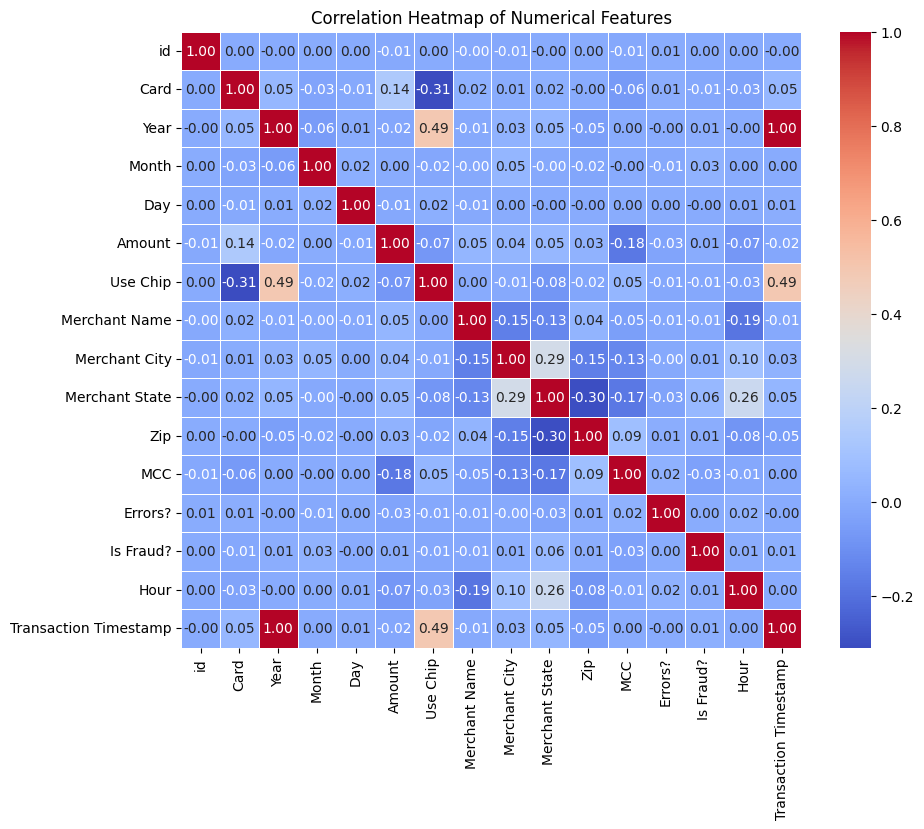

In [29]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **Conclusion**:

This heatmap visualizes the correlation between numerical features. High positive values (close to 1) indicate a strong positive correlation, values near 0 suggest a weak or no relationship, and values close to -1 represent a strong negative correlation. For example, the strong positive correlation (1.00) between 'Year' and 'Transaction Timestamp' is expected, as the timestamp is likely derived from the date columns.

## **2. Box Plot: Transaction Amount by Fraud Status**
Purpose: To analyze transaction amount distributions for fraudulent vs. non-fraudulent transactions.

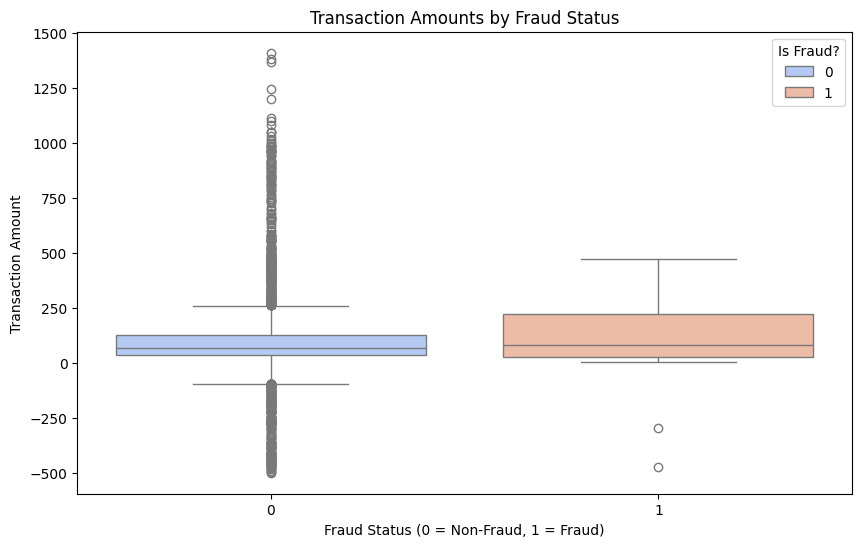

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraud?', y='Amount', data=df, hue='Is Fraud?', palette='coolwarm')
plt.title("Transaction Amounts by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

### **Conclusion**:

This plot illustrates the distribution of transaction amounts for fraudulent and non-fraudulent transactions, highlighting the median, quartiles, and potential outliers. Fraudulent transactions tend to have a wider range of amounts and higher outliers compared to non-fraudulent transactions.



## **3. Line Plot: Hourly Transaction Trends**
Purpose: To observe transaction trends across different hours of the day.

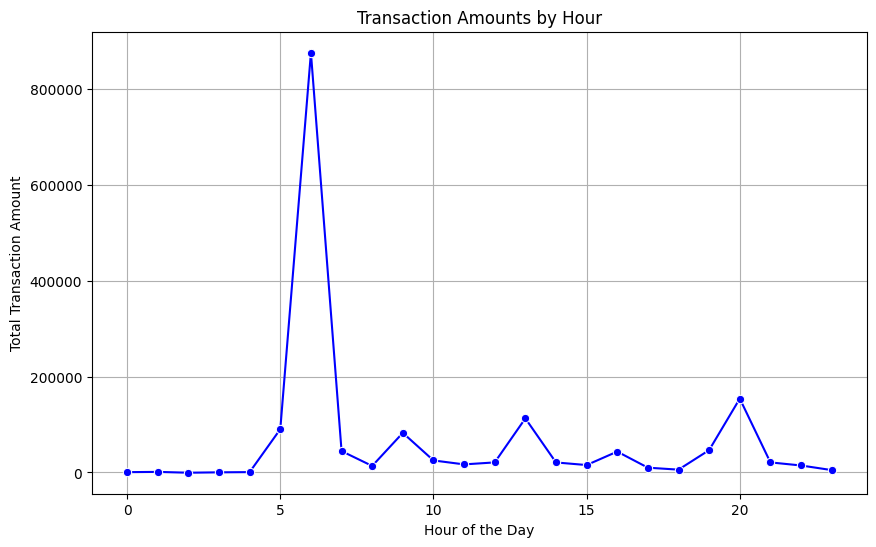

In [31]:
hourly_pattern = df.groupby('Hour')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Amount', data=hourly_pattern, marker='o', color='blue')
plt.title("Transaction Amounts by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Transaction Amount")
plt.grid()
plt.show()


### **Conclusion**:
This line plot displays the total transaction amount for each hour of the day. It reveals patterns and trends in transaction activity throughout the day, allowing for identification of peak and low transaction periods.

## **4. Bar Plot: Spending by Merchant State**
Purpose: To understand geographic spending patterns.

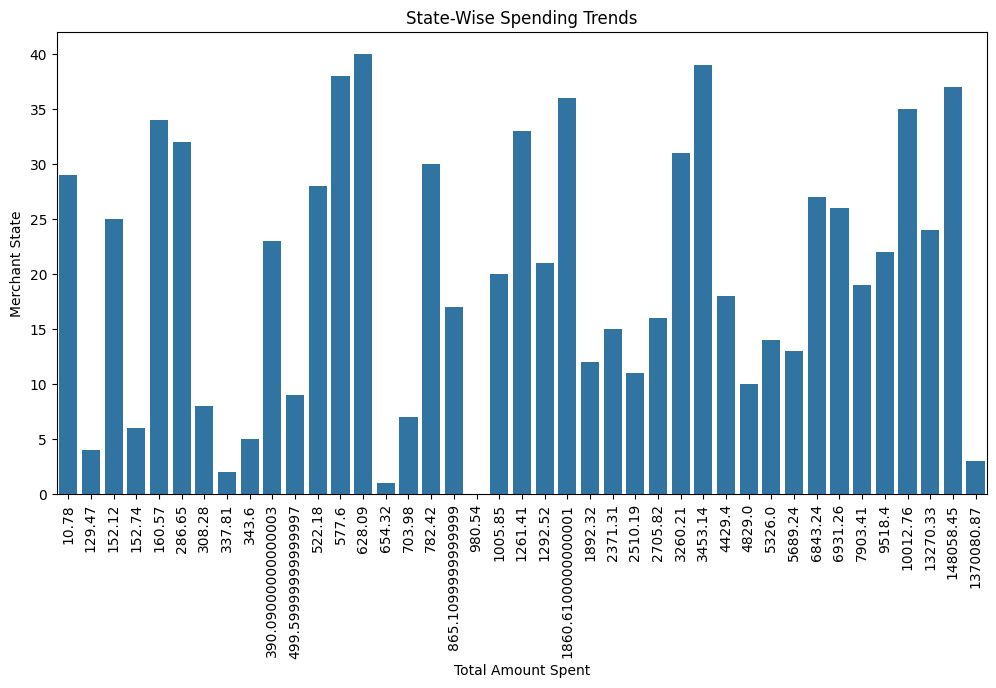

In [32]:
state_trends = df.groupby('Merchant State')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
state_trends_sorted = state_trends.sort_values(by='Amount', ascending=False)
sns.barplot(x='Amount', y='Merchant State', data=state_trends_sorted)
plt.title("State-Wise Spending Trends")
plt.xlabel("Total Amount Spent")
plt.ylabel("Merchant State")
plt.xticks(rotation=90)
plt.show()

### **Conclusion:**
This bar plot showcases the total spending across different merchant states. The height of each bar corresponds to the total transaction amount for that state, providing insights into geographic spending patterns and identifying states with the highest transaction volumes.

## **5. Pair Plot: Exploring Relationships**
Purpose: To study relationships among key numerical variables.

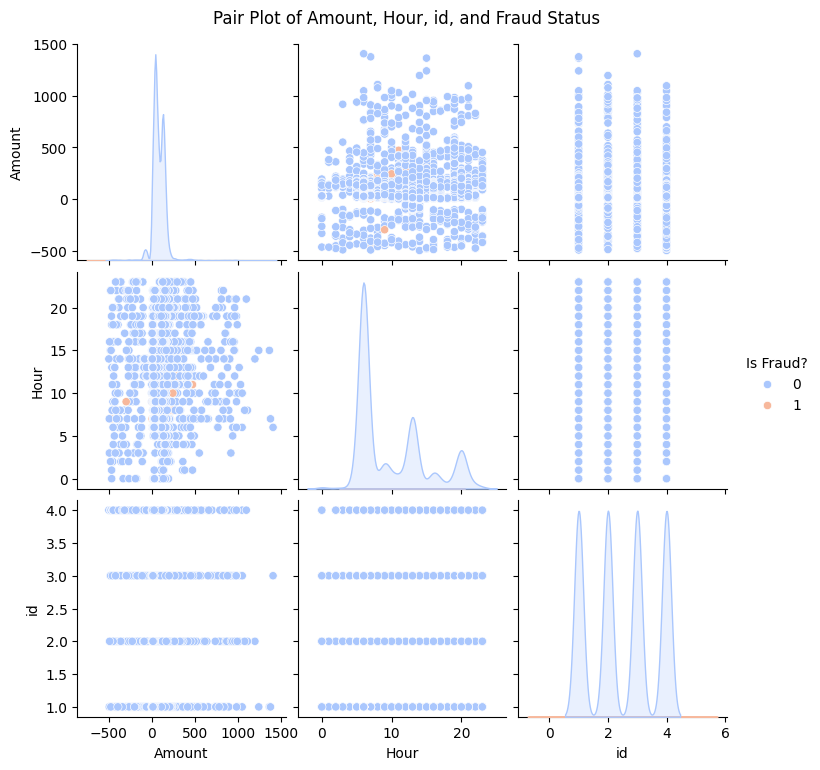

In [33]:
pairplot_data = df[['Amount', 'Hour', 'id', 'Is Fraud?']]

sns.pairplot(pairplot_data, hue='Is Fraud?', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pair Plot of Amount, Hour, id, and Fraud Status", y=1.02)
plt.show()


## Conclusion:
This pair plot visualizes relationships between selected numerical variables ('Amount', 'Hour', 'id', and 'Is Fraud?') using scatter plots for each pair. The diagonal displays the distribution of each individual variable. The plot helps in identifying patterns, correlations, and potential interactions between these variables.

## **6. Strip Plot: Transaction Amount by User**
Purpose: To visualize individual spending patterns across users.

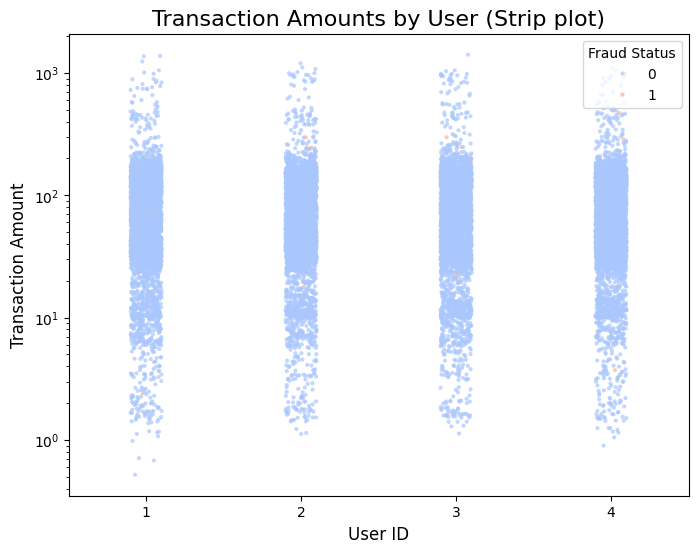

In [34]:
plt.figure(figsize=(8, 6))

sns.stripplot(x='id', y='Amount', data=df, alpha=0.7, size=3, hue='Is Fraud?', palette='coolwarm')
plt.title("Transaction Amounts by User (Strip plot)", fontsize=16)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)

plt.yscale('log')

plt.legend(title="Fraud Status", loc='upper right')
plt.show()


### **Conclusion**:
This strip plot shows individual spending patterns across different users. Each dot represents a transaction, with the y-axis indicating the transaction amount and horizontal grouping by user ID. It helps visualize transaction frequency and amount variability for each user, highlighting potential outliers or unusual spending behaviors.

## **7. Box Plot: Transaction Amount by Chip Usage**
Purpose: To evaluate the impact of chip usage on transaction amounts.

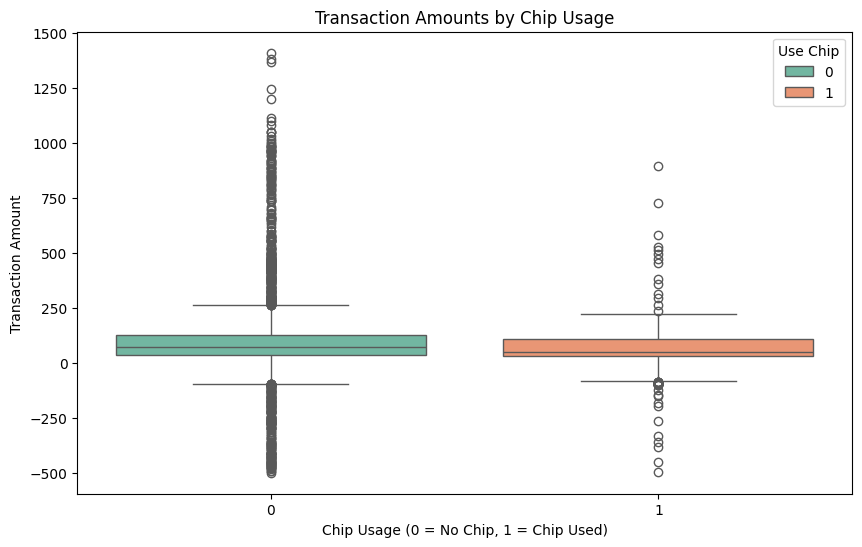

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Use Chip', y='Amount', data=df, hue='Use Chip', palette='Set2')
plt.title("Transaction Amounts by Chip Usage")
plt.xlabel("Chip Usage (0 = No Chip, 1 = Chip Used)")
plt.ylabel("Transaction Amount")
plt.show()


### **Conclusion**:
This box plot compares the distribution of transaction amounts for transactions with and without chip usage. It helps assess whether chip usage has an impact on transaction amounts, potentially revealing differences in transaction patterns or fraud risk between the two groups.